# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [563]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Pymaceutical_combined = pd.merge(study_results,mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])
Pymaceutical_combined.head()

# Display the data table for preview


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [564]:
# Checking the number of mice.
Total_Mice = pd.DataFrame(mouse_metadata)
Mice_count = Total_Mice["Mouse ID"].count()
Mice_count


249

In [565]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_MiceID_Timepoint = study_results[study_results.duplicated(["Mouse ID","Timepoint"])]
duplicate_MiceID_Result = duplicate_MiceID_Timepoint["Mouse ID"].unique()
duplicate_MiceID_Result

array(['g989'], dtype=object)

In [566]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_MiceID = Pymaceutical_combined[Pymaceutical_combined["Mouse ID"] == 'g989']
duplicate_MiceID


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [567]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_duplicate_MiceID = Pymaceutical_combined.drop_duplicates(["Mouse ID"])
clean_data = drop_duplicate_MiceID[drop_duplicate_MiceID["Mouse ID"] != 'g989']
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [568]:
# Checking the number of mice in the clean DataFrame.
Clean_mice = clean_data["Mouse ID"].count()
Clean_mice

248

## Summary Statistics

In [569]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
# Drug_Regimen_Data= Pymaceutical_combined.set_index(["Drug Regimen"])
# Drug_Regimen_Data

Mean_Tumor_Volume = Pymaceutical_combined.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
Median_Tumor_Volume = Pymaceutical_combined.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
Variance_Tumor_Volume = Pymaceutical_combined.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
SD_Tumor_Volume = Pymaceutical_combined.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
SEM_Tumor_Volume = Pymaceutical_combined.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

Drug_Regimen_Data = pd.DataFrame({
    "Mean Tumor Volume":Mean_Tumor_Volume,
    "Median Tumor Volume":Median_Tumor_Volume,
    "Tumor Volume Variance":Variance_Tumor_Volume,
    "Tumor Volume Std. Dev.":SD_Tumor_Volume,
    "Tumor Volume Std. Err.":SEM_Tumor_Volume
    })
Drug_Regimen_Data

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [570]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
Data_aggregation = Pymaceutical_combined.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
Data_aggregation


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [571]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
Mice_tested = Pymaceutical_combined["Drug Regimen"].value_counts()
Mice_tested

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug Regimen, dtype: int64

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice')

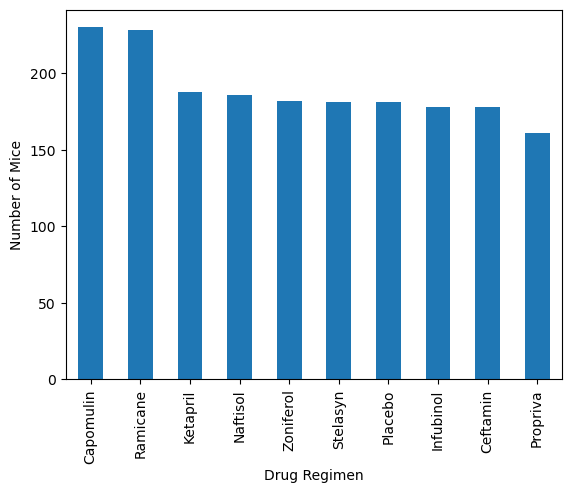

In [572]:
#Create the first bar chart with the Pandas DataFrame.plot() method.
plot_pd_bar = Mice_tested.plot.bar()  
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
#plt.title("Number of Mice per Treatment")

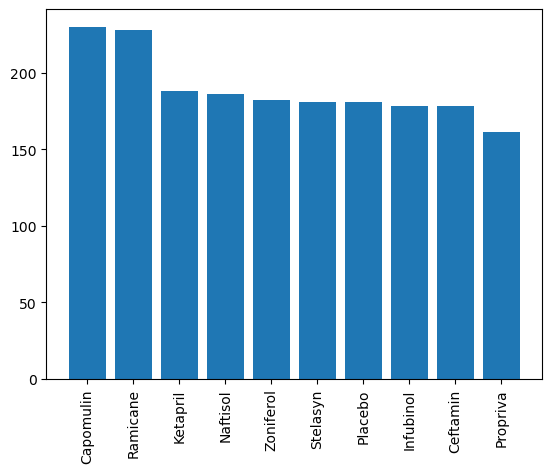

In [573]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

Mice= np.array(["Capomulin","Ramicane","Ketapril","Naftisol","Zoniferol","Stelasyn","Placebo","Infubinol","Ceftamin","Propriva"])
drug =np.array([230,228,188,186,182,181,181,178,178,161]) 
plt.bar(Mice ,drugs,align="center")
plt.xticks(rotation=90)
plt.show()   


In [574]:
#showing the distribution of female versus male mice
Male_Female = Pymaceutical_combined["Sex"].value_counts()
Male_Female



Male      958
Female    935
Name: Sex, dtype: int64

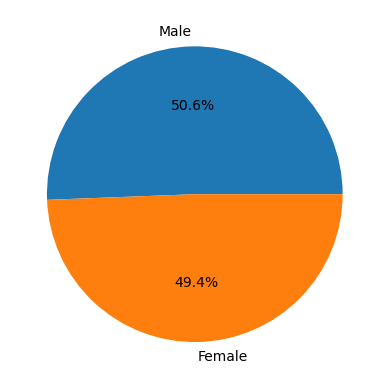

In [575]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
df= pd.DataFrame({"Sex": ['Male', 'Female'],
                  "Size": [958,935]})
# plot = df.plt.pie(y='Sex', figsize=(5, 5))
plt.pie(df["Size"], labels= df["Sex"],autopct="%1.1f%%")
plt.show()

([<matplotlib.patches.Wedge at 0x7f8f921a20d0>,
 [Text(-0.02099250347258543, 1.0997996703027118, 'Male'),
  Text(0.020992503472585782, -1.0997996703027118, 'Female')],
 [Text(-0.01145045643959205, 0.5998907292560246, '50.6%'),
  Text(0.011450456439592244, -0.5998907292560246, '49.4%')])

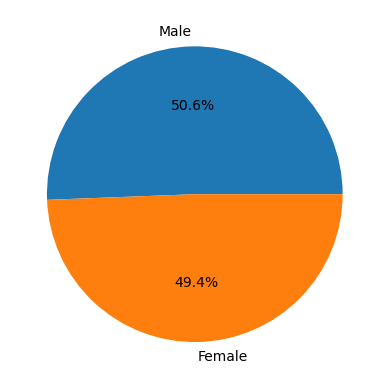

In [576]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Male", "Female"]
sizes = [958, 935]
plt.pie(sizes, labels=labels, autopct="%1.1f%%")

## Quartiles, Outliers and Boxplots

In [577]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_regimens = Pymaceutical_combined.loc[Pymaceutical_combined["Drug Regimen"] == "Capomulin",:]
Ramicane_regimens = Pymaceutical_combined.loc[Pymaceutical_combined["Drug Regimen"] == "Ramicane", :]
Infubinol_regimens = Pymaceutical_combined.loc[Pymaceutical_combined["Drug Regimen"] == "Infubinol", :]
Ceftamin_regimens = Pymaceutical_combined.loc[Pymaceutical_combined["Drug Regimen"] == "Ceftamin", :]

#Create a grouped DataFrame that shows the last (greatest) time point for each mouse. 
#Merge this grouped DataFrame with the original cleaned DataFrame.
#Create a list that holds the treatment names as well as a second, empty list to hold the tumor volume data.
#Loop through each drug in the treatment list, locating the rows in the merged DataFrame that correspond to each treatment. 
# Append the resulting final tumor volumes for each drug to the empty list.
#Determine outliers by using the upper and lower bounds, and then print the results.
    
Capomulin_final = pd.DataFrame(Capomulin_regimens.groupby('Mouse ID').max()['Timepoint'])
Capomulin_merge = pd.merge(Capomulin_final, Pymaceutical_combined, how="left", on=("Mouse ID","Timepoint"))
Capomulin_merge
Capomulin= Capomulin_merge["Tumor Volume (mm3)"]
quartiles = Capomulin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - 1.5*iqr
upper_bound = upperq + 1.5*iqr


Remicane_final = pd.DataFrame (Ramicane_regimens.groupby('Mouse ID').max()['Timepoint'])
Remicane_merge = pd.merge(Remicane_final, Pymaceutical_combined, how="left", on=("Mouse ID","Timepoint"))
Remicane_merge.head()
Remicane = Remicane_merge["Tumor Volume (mm3)"]
quartiles = Remicane.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - 1.5*iqr
upper_bound = upperq + 1.5*iqr


Infubinol_final = pd.DataFrame(Infubinol_regimens.groupby('Mouse ID').max()['Timepoint'])
Infubinol_merge = pd.merge(Infubinol_final, Pymaceutical_combined, how="left", on=("Mouse ID","Timepoint"))
Infubinol_merge.head()
Infubinol = Infubinol_merge["Tumor Volume (mm3)"]
quartiles = Infubinol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - 1.5*iqr
upper_bound = upperq + 1.5*iqr


Ceftamin_final = pd.DataFrame(Ceftamin_regimens.groupby('Mouse ID').max()['Timepoint'])
Ceftamin_merge = pd.merge(Ceftamin_final, Pymaceutical_combined, how="left", on=("Mouse ID","Timepoint"))
Ceftamin_merge.head()
Ceftamin = Ceftamin_merge["Tumor Volume (mm3)"]
quartiles = Ceftamin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - 1.5*iqr
upper_bound = upperq + 1.5*iqr


print(f"Capomulin's potential outliers: lower {lower_bound} and upper {upper_bound} could be outliers.")
print(f"Ramicane potential outliers: lower {lower_bound} and upper {upper_bound} could be outliers.")
print(f"Infubinol potential outliers:lower {lower_bound} and upper {upper_bound} could be outliers.")
print(f"Ceftamin potential outliers: lower {lower_bound} and upper {upper_bound} could be outliers.")


Capomulin's potential outliers: lower 25.355449580000002 and upper 87.66645829999999 could be outliers.
Ramicane potential outliers: lower 25.355449580000002 and upper 87.66645829999999 could be outliers.
Infubinol potential outliers:lower 25.355449580000002 and upper 87.66645829999999 could be outliers.
Ceftamin potential outliers: lower 25.355449580000002 and upper 87.66645829999999 could be outliers.


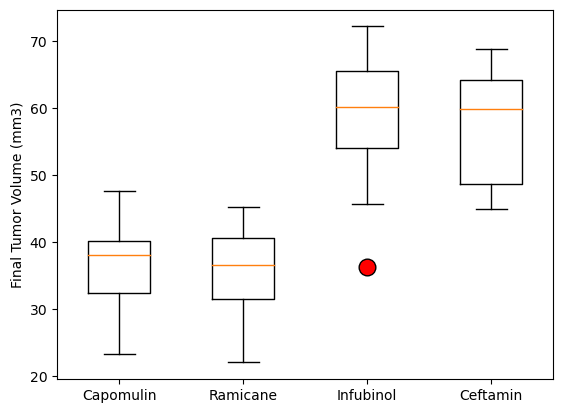

In [590]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

data_to_plot = [Capomulin, Remicane , Infubinol, Ceftamin]
Regimen = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
fig, ax = plt.subplots()
ax.set_ylabel('Final Tumor Volume (mm3)')
orange_out = dict(markerfacecolor='red',markersize=12) 
ax.boxplot(data_to_plot, labels=Regimen, widths = 0.5, vert=True,flierprops= orange_out)

plt.show()

## Line and Scatter Plots

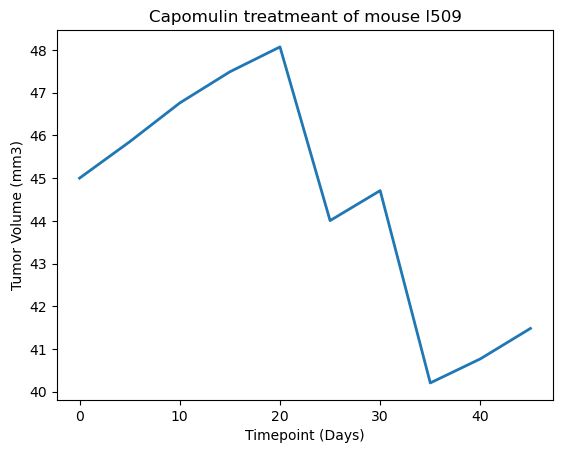

In [579]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

I509_data = Capomulin_regimens.loc[Capomulin_regimens["Mouse ID"] == "l509",:]
x_axis_line= I509_data["Timepoint"]
y_axis_line= I509_data["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis_line, y_axis_line,linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()




Text(0, 0.5, 'Averag Tumor Volume (mm3)')

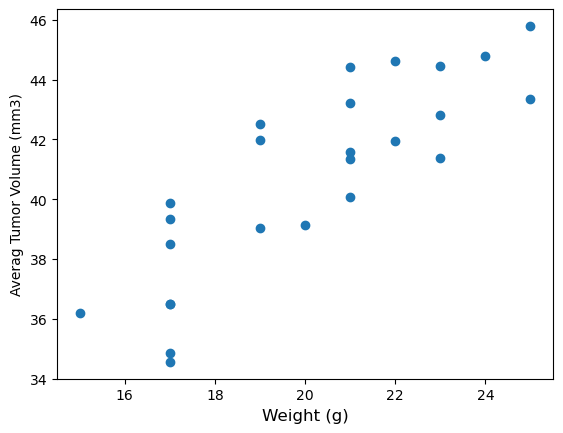

In [580]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Compare the calcualted Pearson's r to the plots

average_value =Capomulin_regimens.groupby(['Mouse ID']).mean()
x_axis_scatter = average_value['Weight (g)']
y_axis_scatter = average_value['Tumor Volume (mm3)']
marker_size=15
plt.scatter(x_axis_scatter,y_axis_scatter)
plt.xlabel('Weight (g)',fontsize =12)
plt.ylabel('Averag Tumor Volume (mm3)')


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


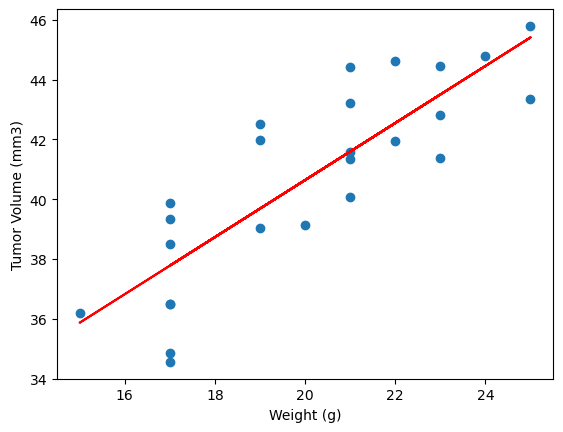

In [581]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_axis_coeff_regrr = average_value["Weight (g)"]
y_axis_coeff_regrr = average_value["Tumor Volume (mm3)"]
correlation = st.pearsonr(average_value['Weight (g)'],average_value['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

(slope, intercept,rvalue, pvalue, stderr)= st.linregress(x_axis_coeff_regrr,y_axis_coeff_regrr)
regress_values= x_axis_coeff_regrr* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_axis_coeff_regrr,y_axis_coeff_regrr)
plt.plot(average_value["Weight (g)"], regress_values, "r-")
#plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
# print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

